In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
test_id = test['Id']

In [5]:
df = train

In [6]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [8]:
train = df

In [9]:
print(f"Number of rows and number of columns in the train dataset are {train.shape[0]} and {train.shape[1]}")
print(f"Number of rows and number of columns in the test dataset are {test.shape[0]} and {test.shape[1]}")

Number of rows and number of columns in the train dataset are 1460 and 80
Number of rows and number of columns in the test dataset are 1459 and 79


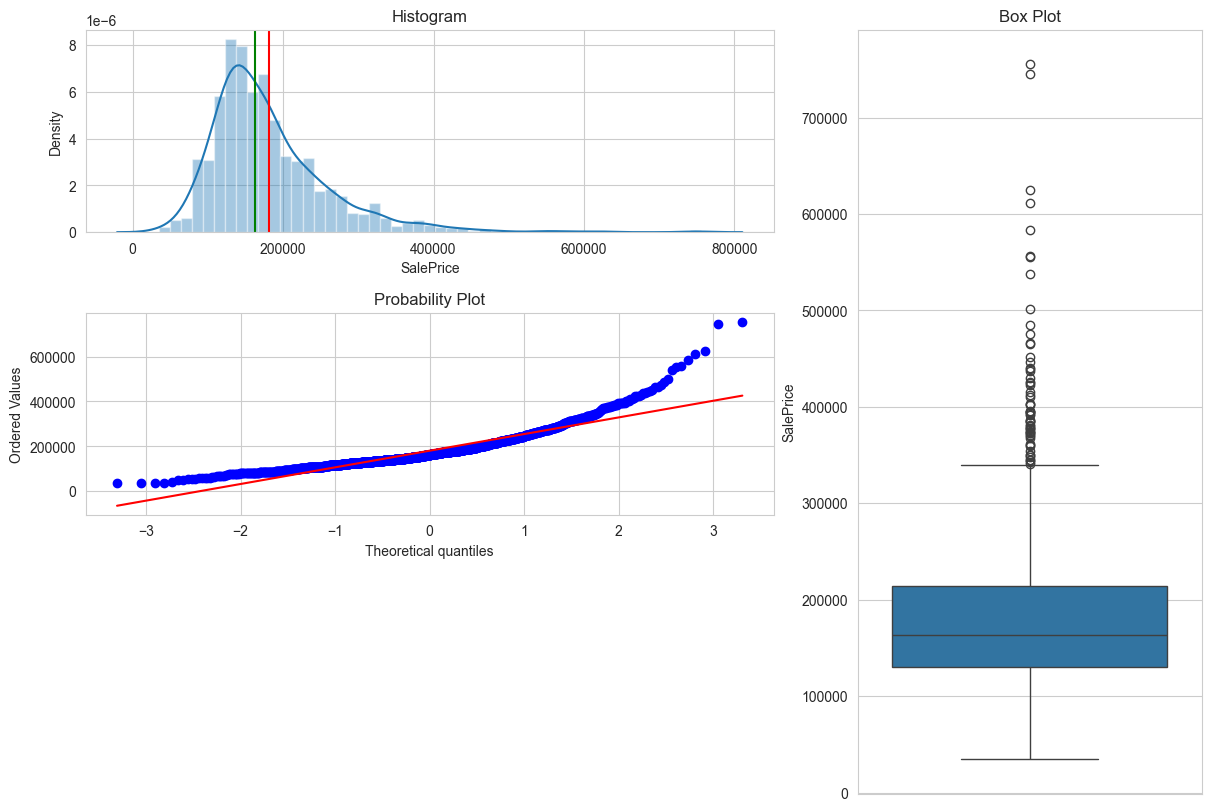

In [10]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(df, 'SalePrice')


In [11]:
from scipy.stats import skew
print("Skewness of the SalesPrice is", df['SalePrice'].skew())

Skewness of the SalesPrice is 1.8828757597682129


In [15]:
!pip install missingno


  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


<Axes: >

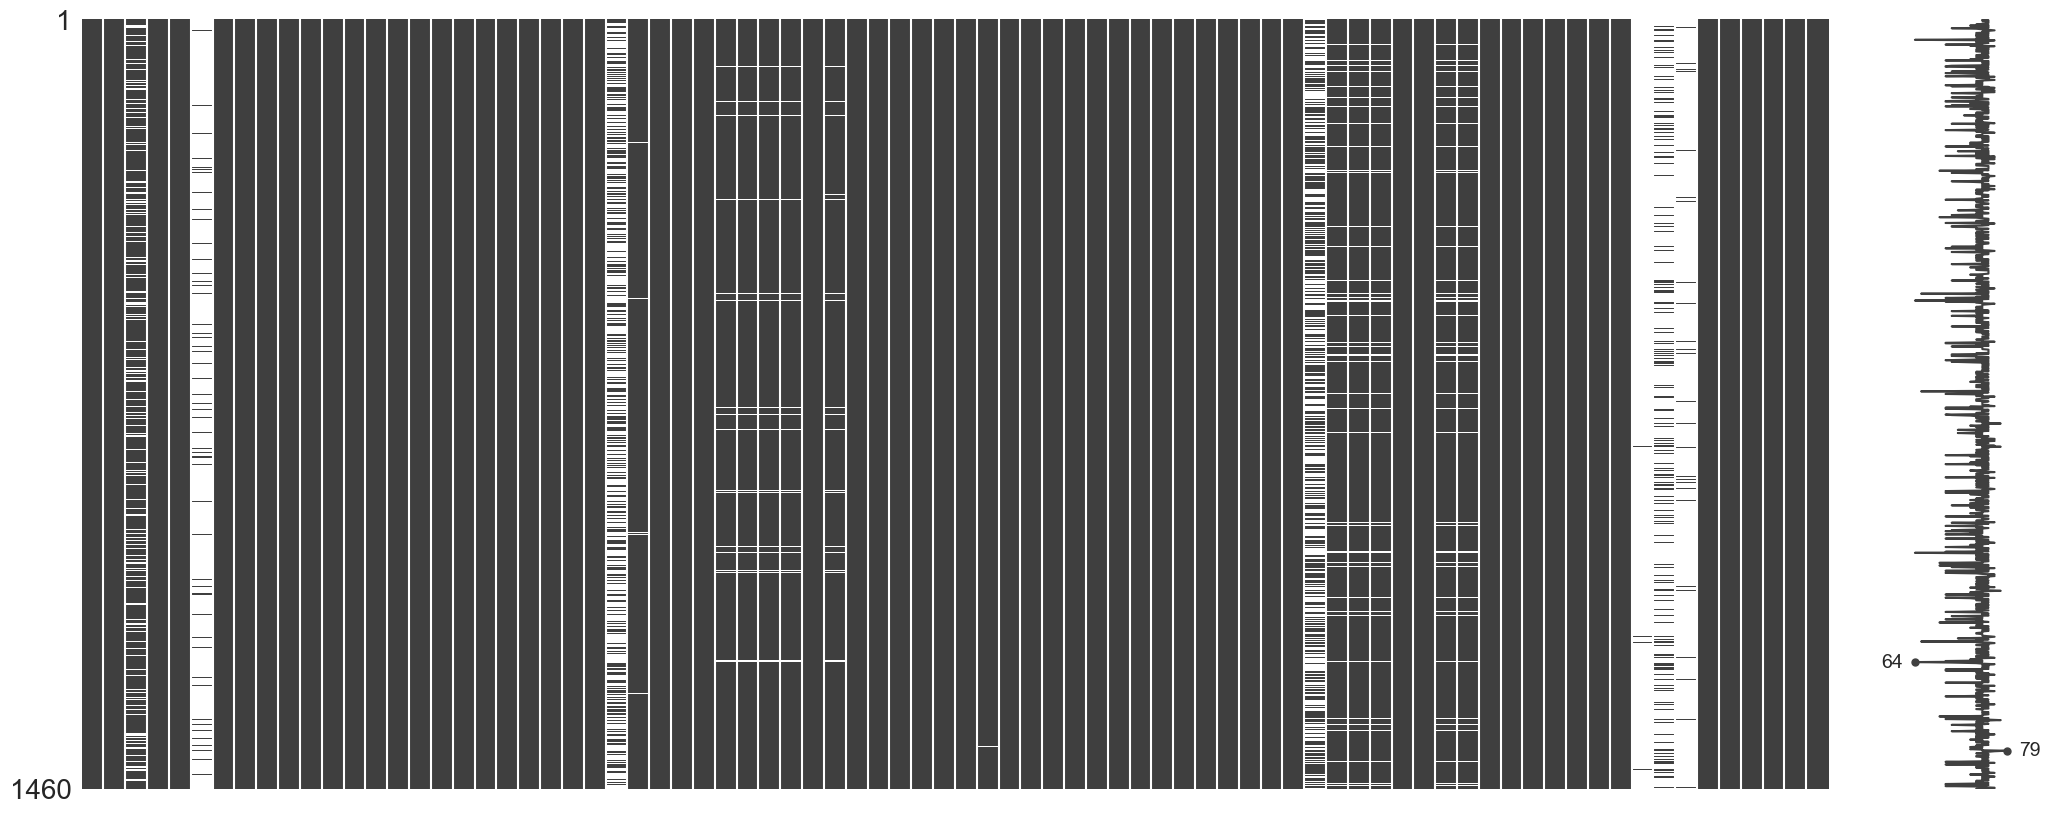

In [16]:
import missingno as msno
%matplotlib inline
msno.matrix(train)

<Axes: >

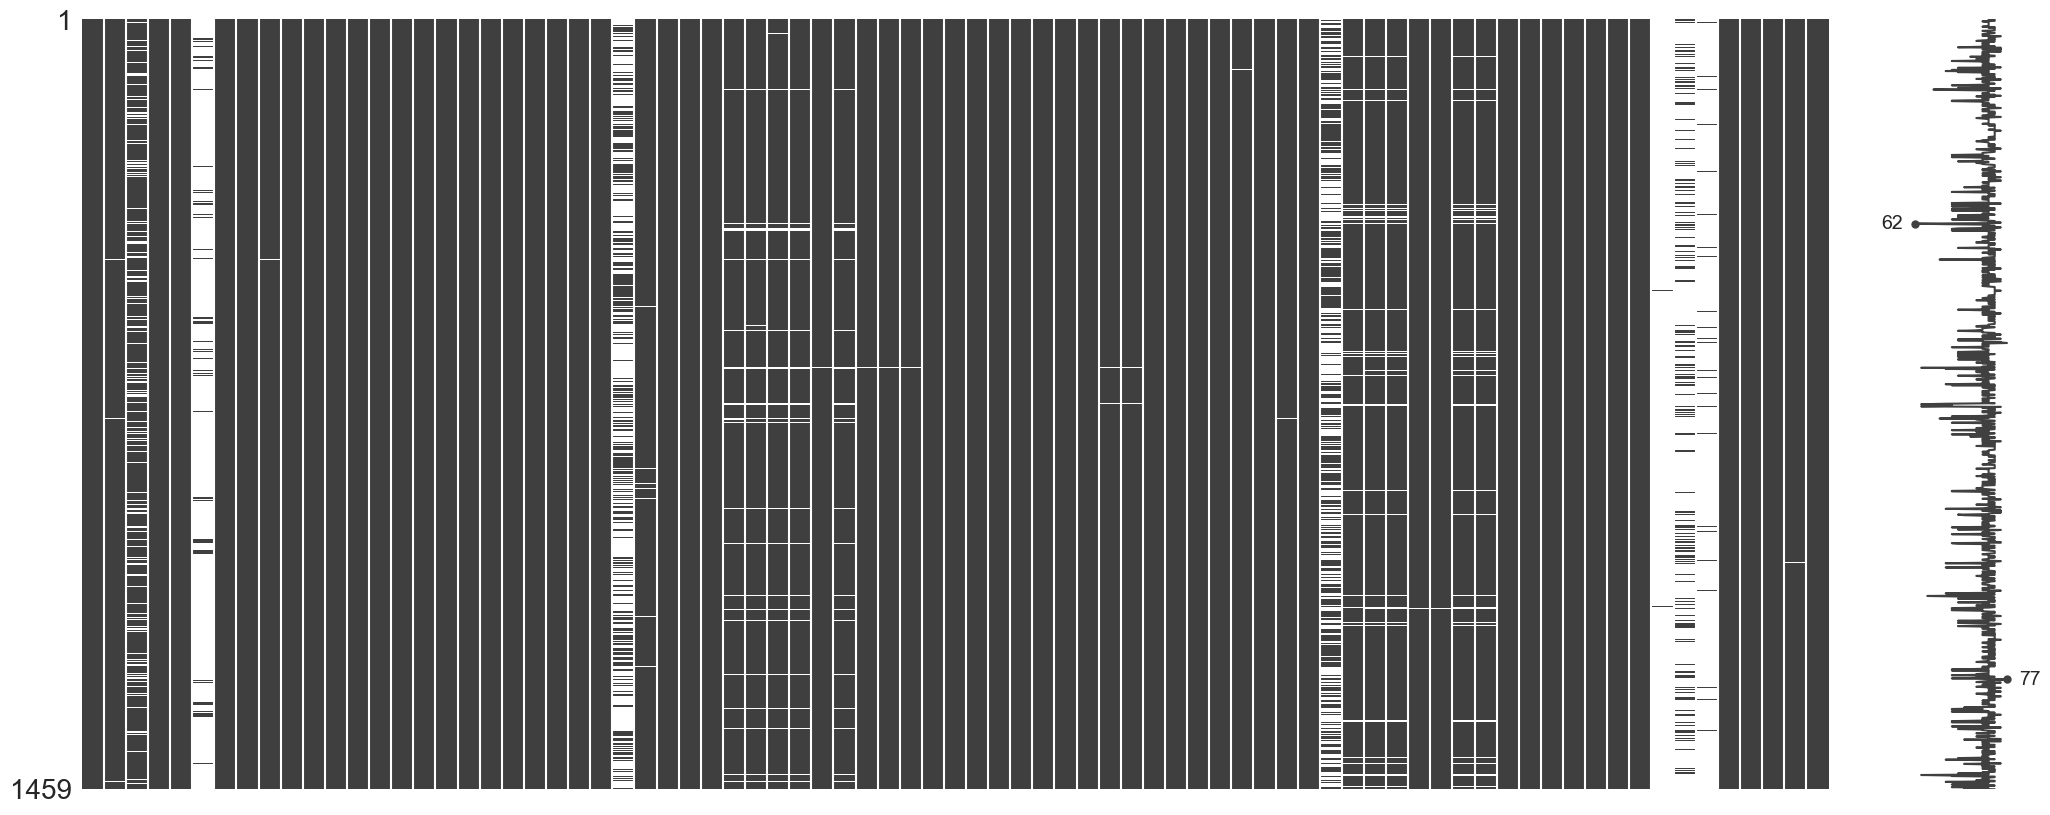

In [17]:
msno.matrix(test)

In [18]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame


In [19]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(10)


,Columns,Count of Null Values,Approximate Percentage of Null Values
59,GarageFinish,81,5.547945
62,GarageQual,81,5.547945
58,GarageYrBlt,81,5.547945
2,LotFrontage,259,17.739726
56,FireplaceQu,690,47.260274
24,MasVnrType,872,59.726027
72,Fence,1179,80.753425
5,Alley,1369,93.767123
73,MiscFeature,1406,96.301370
71,PoolQC,1453,99.520548


In [20]:
null_frame_test = null_table(test)
null_frame_test.sort_values(by = 'Approximate Percentage of Null Values').tail(10)


,Columns,Count of Null Values,Approximate Percentage of Null Values
63,GarageCond,78,5.346127
59,GarageFinish,78,5.346127
62,GarageQual,78,5.346127
2,LotFrontage,227,15.558602
56,FireplaceQu,730,50.034270
24,MasVnrType,894,61.274846
72,Fence,1169,80.123372
5,Alley,1352,92.666210
73,MiscFeature,1408,96.504455
71,PoolQC,1456,99.794380


In [21]:
na = train.shape[0]
nb = test.shape[0]
y_train = train['SalePrice'].to_frame()
# Combine train and test sets
total = pd.concat((train, test), sort = False).reset_index(drop = True)
# Drop the target "SalePrice" and Id columns
total.drop(['SalePrice'], axis = 1, inplace = True)
print(f"Total size is {total.shape}")

Total size is (2919, 79)


In [22]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

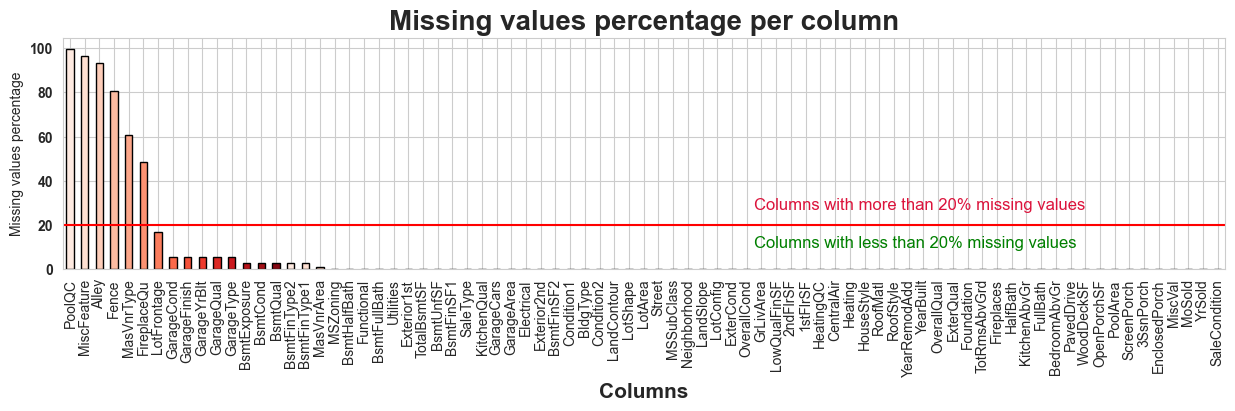

In [23]:
msv_1(total, 20, color=sns.color_palette('Reds',15))

In [24]:
category_var = df.select_dtypes(include = 'object')
num_var = df.select_dtypes(exclude = 'object')

print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  43
Number of numerical features are:  37


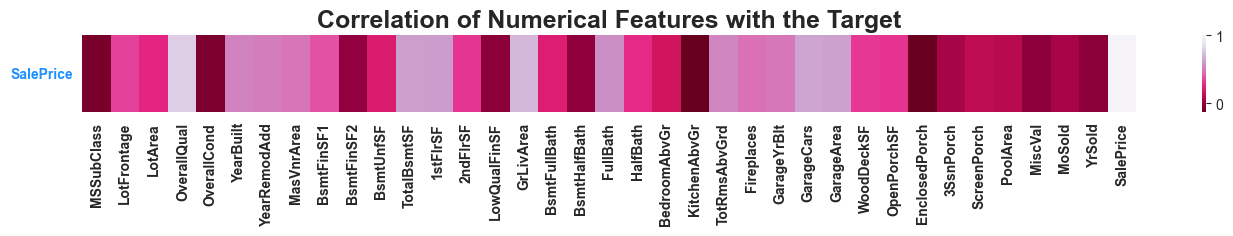

In [25]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))

sns.heatmap(corr_num.sort_values(by = ['SalePrice'], ascending = False).head(1), cmap='PuRd_r')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()


In [28]:
!pip install jinja2


In [29]:
correlation = df.select_dtypes(include='number').corr()['SalePrice'].sort_values(ascending=False).to_frame().head(10)

cmap = sns.light_palette("cyan", as_cmap=True)

s = correlation.style.background_gradient(cmap=cmap)

s


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


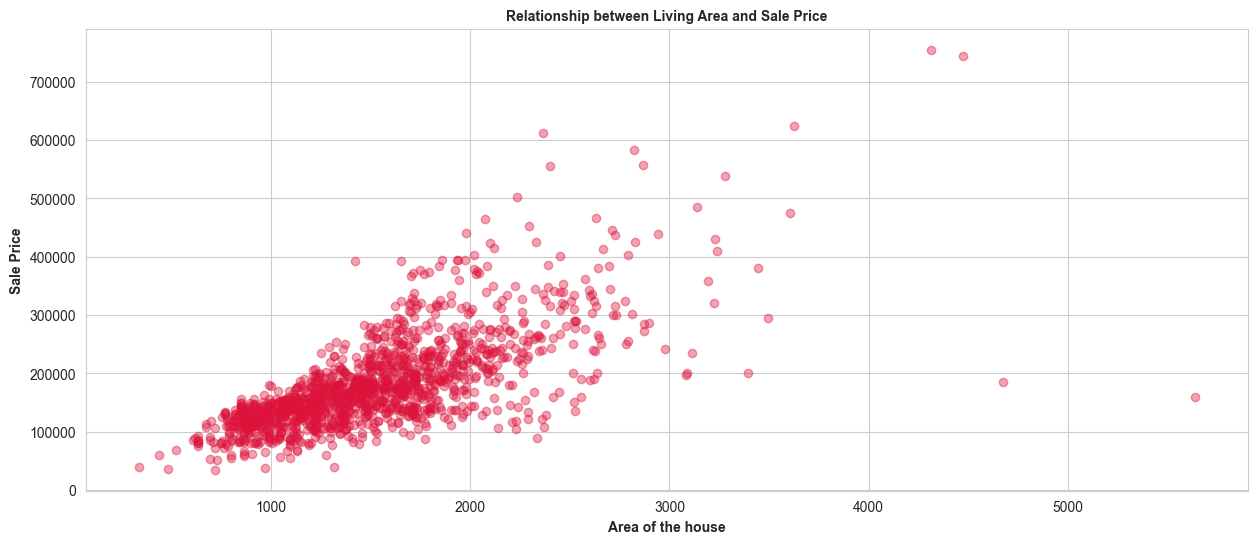

In [30]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df, color='crimson', alpha=0.4)
plt.title('Relationship between Living Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the house', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

In [31]:
train = train[train['GrLivArea'] < 4500]
previous_train = df
df = train

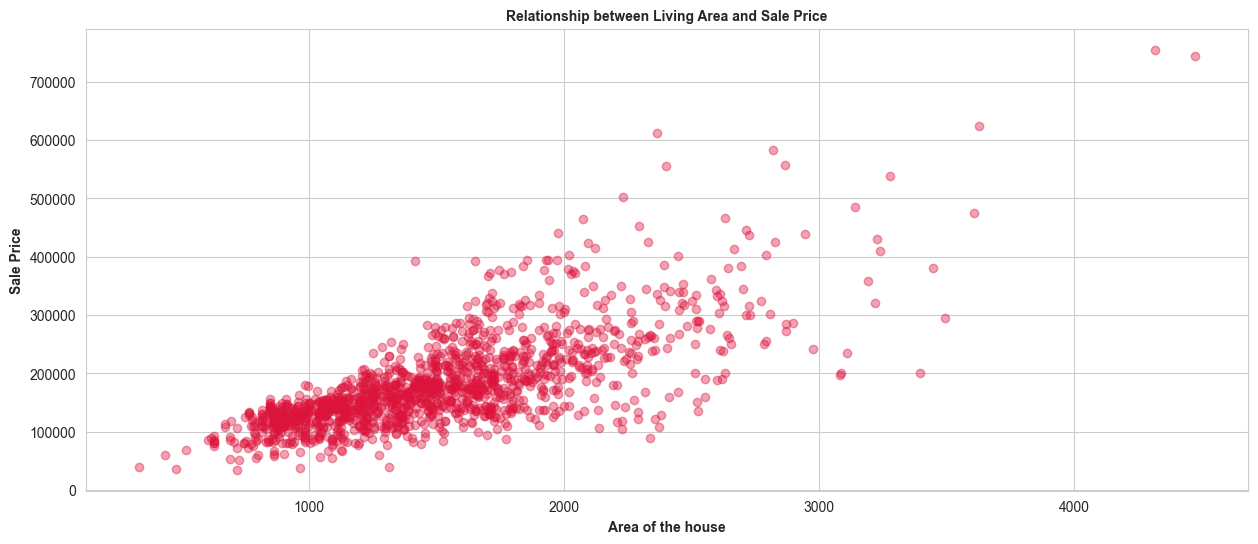

In [32]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df, color='crimson', alpha=0.4)
plt.title('Relationship between Living Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the house', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

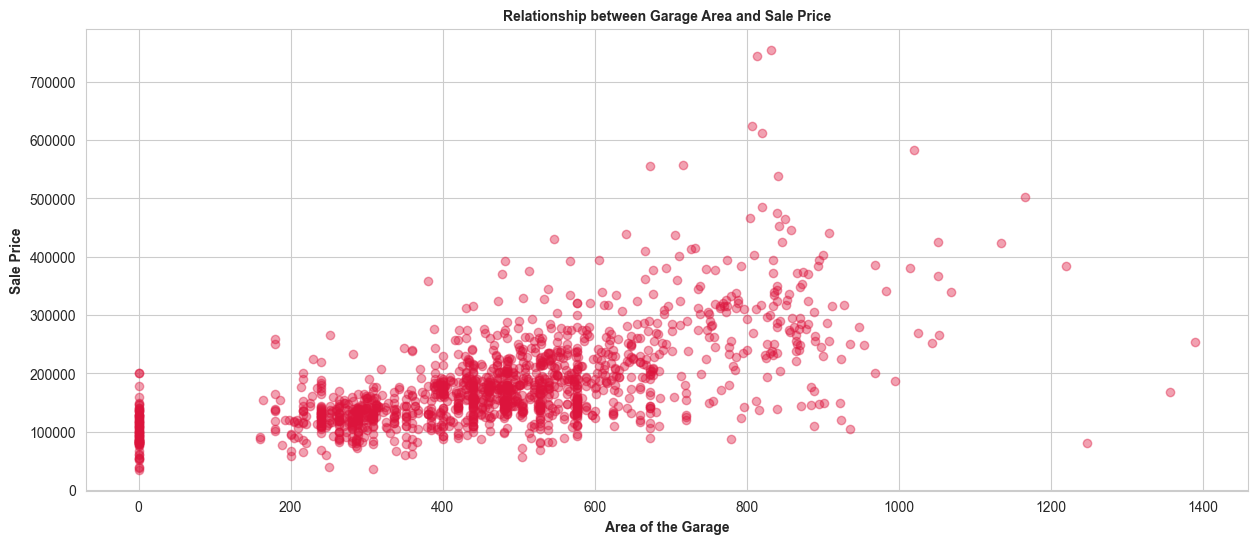

In [33]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = df, color='crimson', alpha=0.4)
plt.title('Relationship between Garage Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the Garage', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

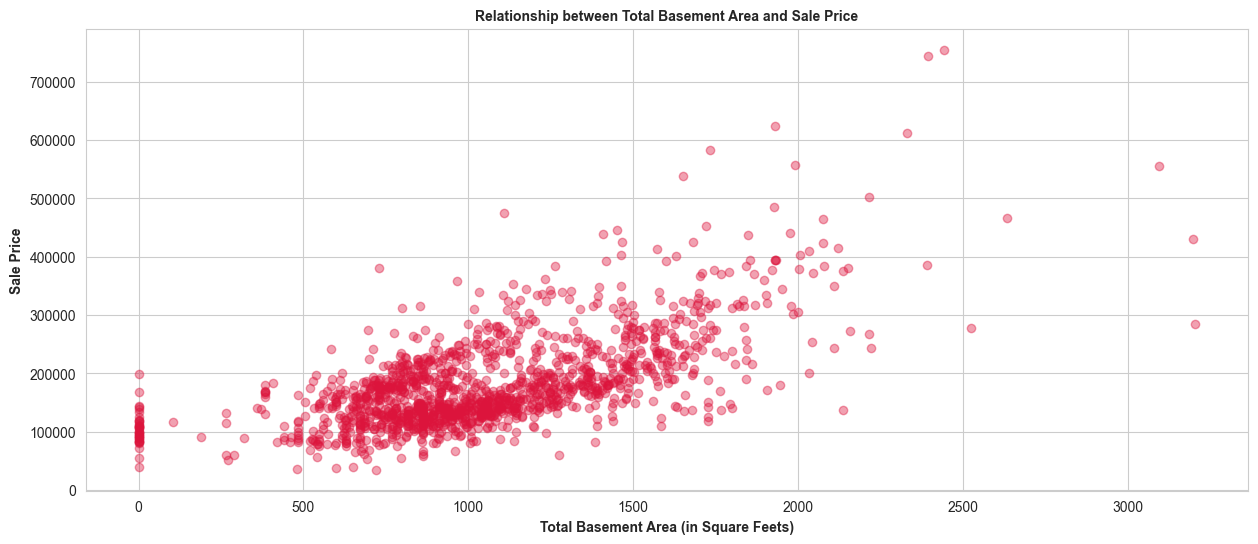

In [34]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df, color = 'crimson', alpha = 0.4)
plt.title('Relationship between Total Basement Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Total Basement Area (in Square Feets)', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

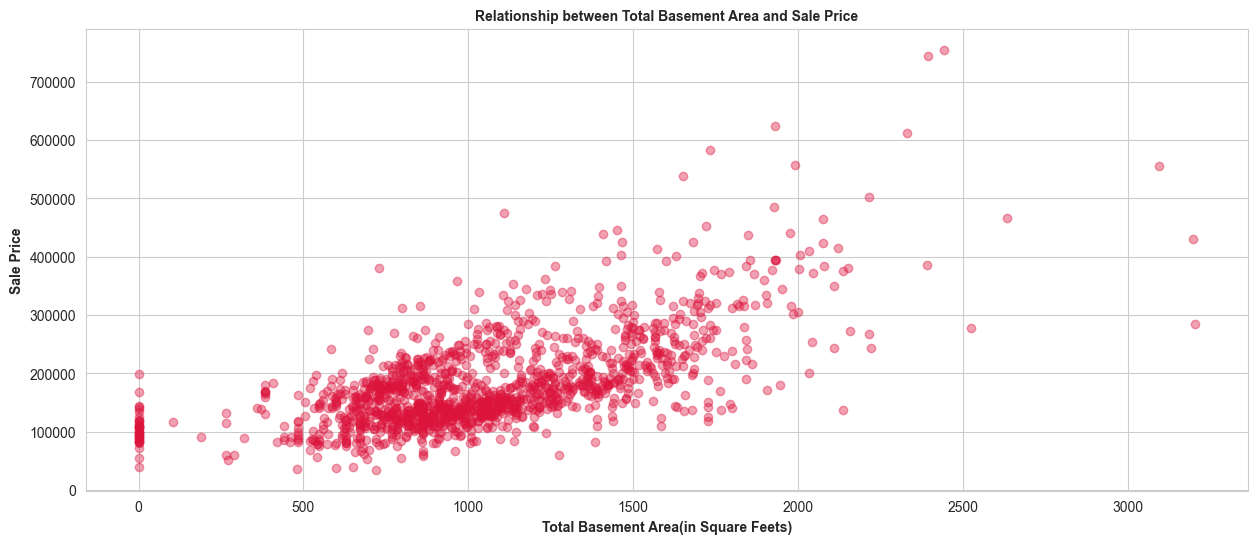

In [35]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df, color = 'crimson', alpha = 0.4)
plt.title('Relationship between Total Basement Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Total Basement Area(in Square Feets)', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

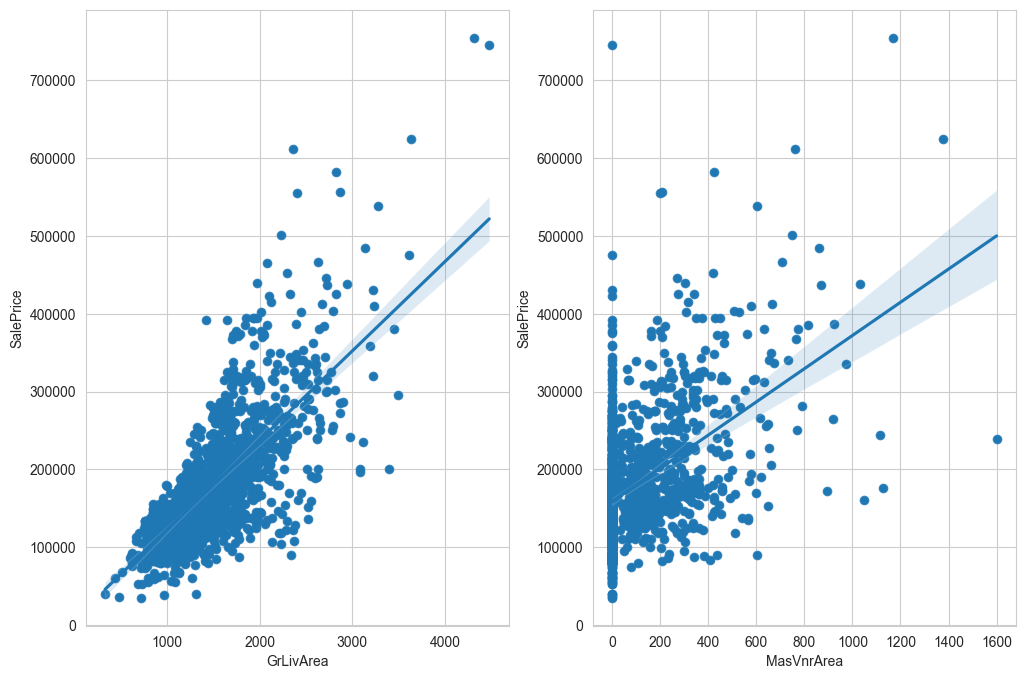

In [36]:
fig, (ax1, ax2) = plt.subplots(figsize = (12, 8), ncols = 2,sharey = False)
 
sns.scatterplot(x = df['GrLivArea'], y = df['SalePrice'],  ax = ax1)
## Putting a regression line. 
sns.regplot(x = df['GrLivArea'], y = df['SalePrice'], ax = ax1)

sns.scatterplot(x = df['MasVnrArea'],y = df['SalePrice'], ax = ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x = df['MasVnrArea'], y = df['SalePrice'], ax=ax2)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

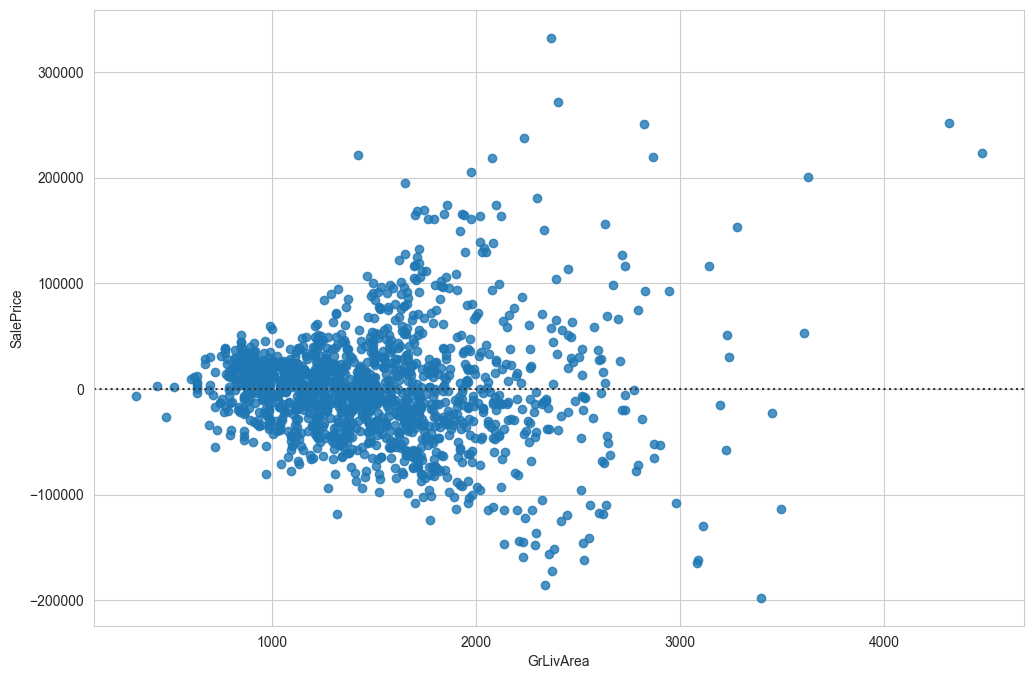

In [38]:
plt.subplots(figsize=(12, 8))
sns.residplot(x=df['GrLivArea'], y=df['SalePrice'])


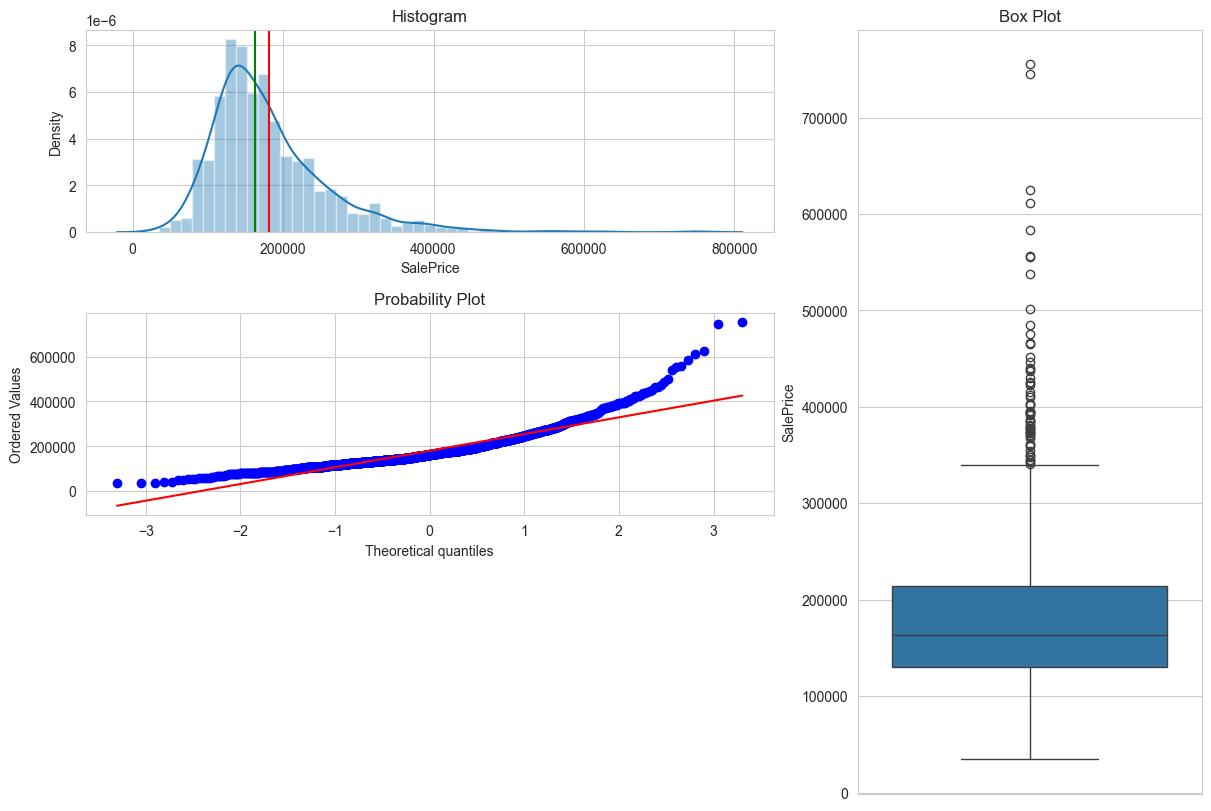

In [39]:
three_chart_plot(df, 'SalePrice')

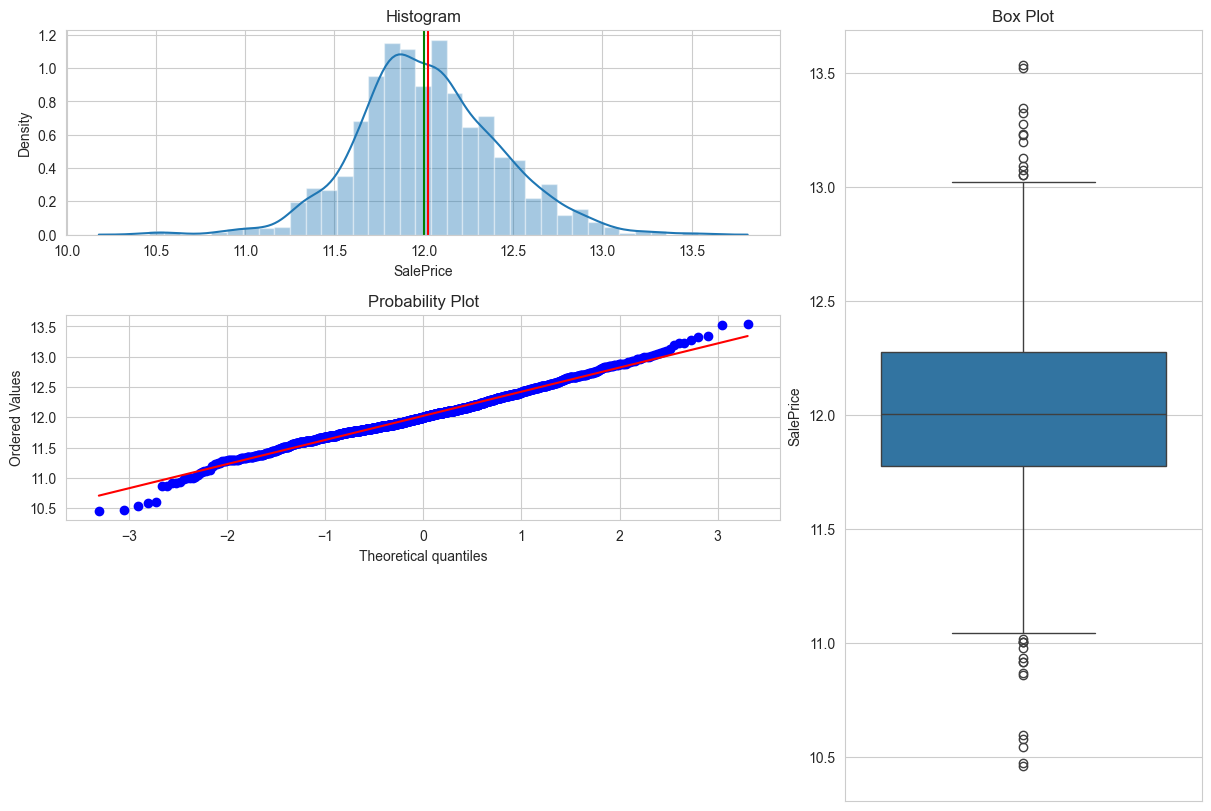

In [40]:
train["SalePrice"] = np.log1p(train["SalePrice"])
df = train
three_chart_plot(df, 'SalePrice')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

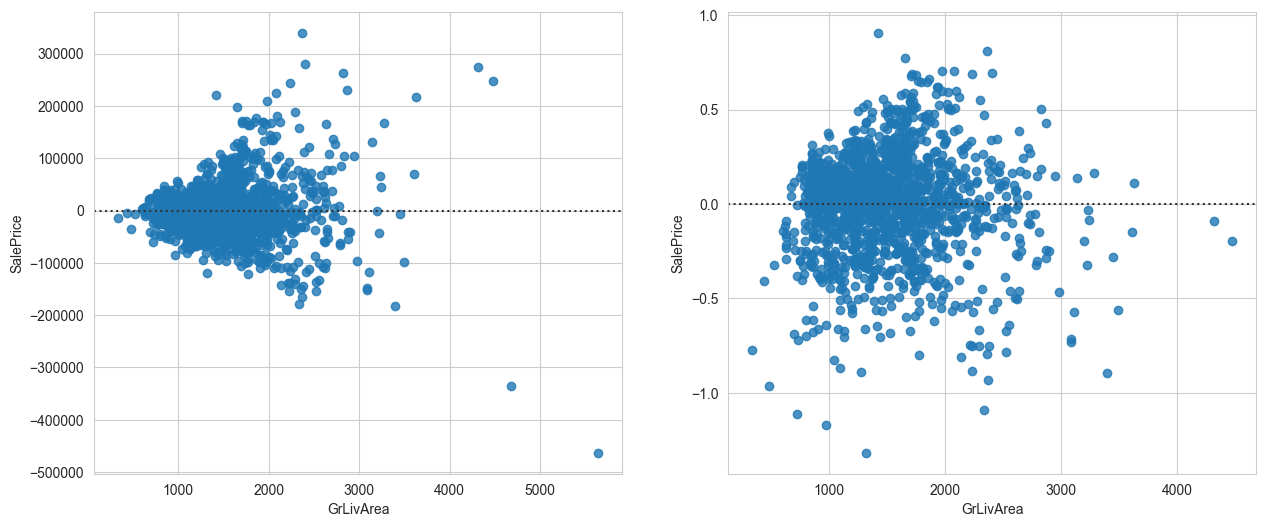

In [42]:
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols=2, sharey=False, sharex=False)

sns.residplot(x=previous_train['GrLivArea'], y=previous_train['SalePrice'], ax=ax1)
sns.residplot(x=df['GrLivArea'], y=df['SalePrice'], ax=ax2)


<Figure size 1500x1000 with 0 Axes>

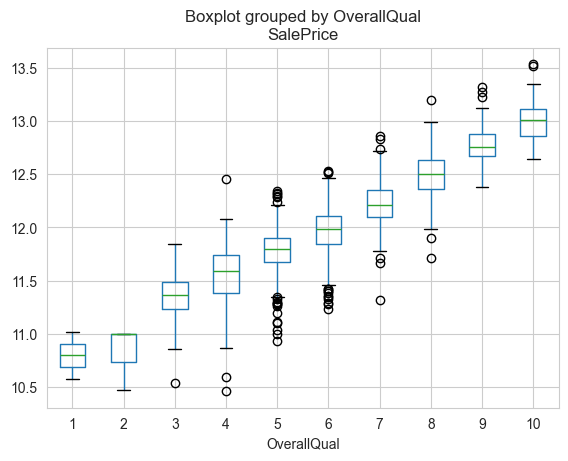

In [43]:
plt.figure(figsize = ((15, 10)))
df.boxplot(by = 'OverallQual', column = 'SalePrice')
plt.show()

In [44]:
def horizontal_plot(data, column_name, color, plot_title):
    
    """
    A function that plots a horizontal bar graph for the given column name
    """
    
    fig, ax = plt.subplots(figsize = (9, 6))
    
    title_cnt = data[column_name].value_counts().sort_values(ascending = False).reset_index()

    mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor = 'black', color =
                sns.color_palette(color, len(title_cnt)))

    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)

    # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    # Add x,y gridlines
    ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

    # Show top values 
    ax.invert_yaxis()

    ax.set_title(plot_title,weight='bold',loc='center', pad=10, fontsize=16)
    
    ax.set_xlabel('Count', weight='bold')

    for i in ax.patches:
        ax.text(i.get_width() + 1.0, i.get_y() + 0.5, str(round((i.get_width()), 2)),
                fontsize=10, fontweight='bold', color='grey')

    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    plt.show()


In [46]:
import matplotlib.pyplot as plt

def horizontal_plot(data, column, color, title, top_n=10):
    # Get the top N frequent categories
    value_counts = data[column].value_counts().head(top_n)

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create horizontal bar plot
    ax.barh(value_counts.index, value_counts.values, color=color)
    
    # Title and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Count', fontsize=12)
    ax.set_ylabel(column, fontsize=12)
    
    # Invert y-axis so the most frequent is on top
    ax.invert_yaxis()

    # Style the grid
    ax.grid(True, axis='x', color='grey', linestyle='--', linewidth=1, alpha=0.3)
    
    # Tick parameters
    ax.yaxis.set_tick_params(pad=10)
    
    plt.tight_layout()
    plt.show()


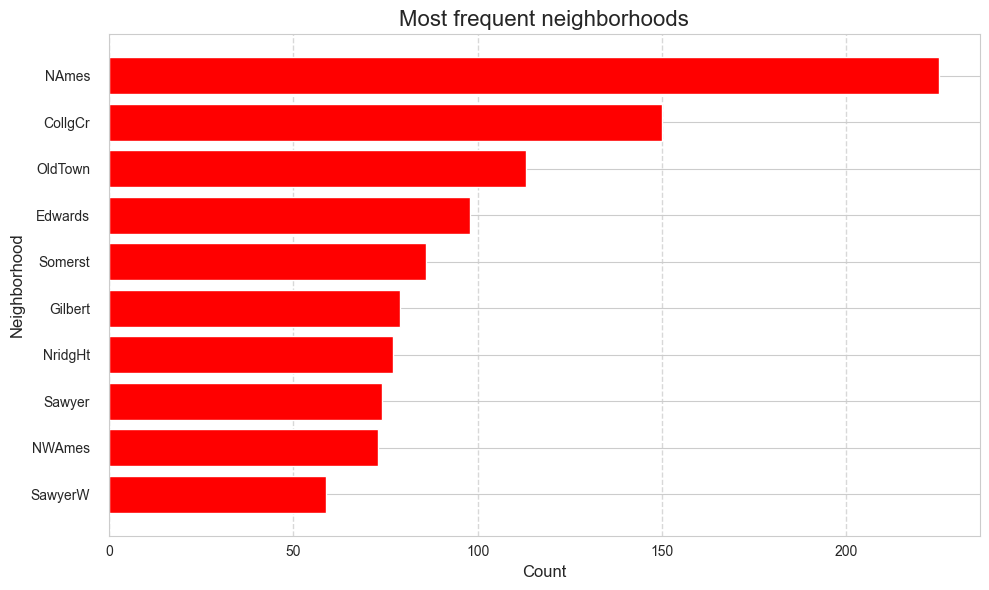

In [47]:
horizontal_plot(df, 'Neighborhood', 'red', 'Most frequent neighborhoods')


ValueError: 'facecolor' or 'color' argument must be a valid color orsequence of colors.

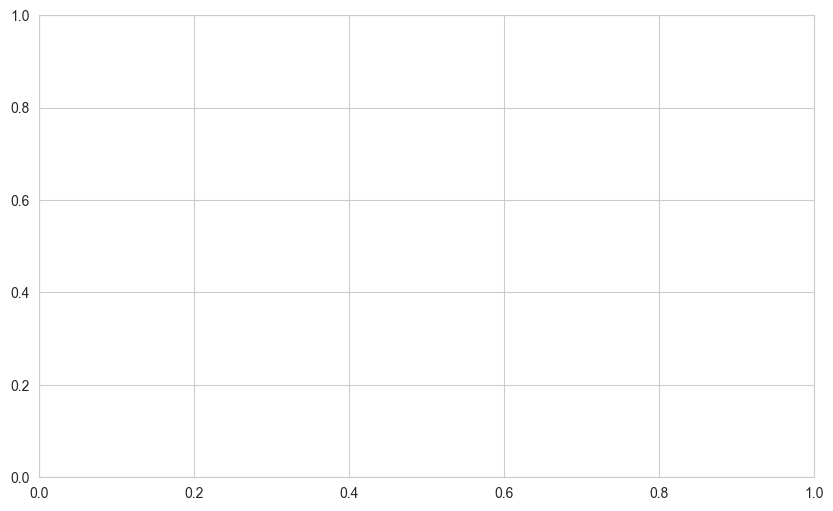

In [48]:
horizontal_plot(df, 'BldgType', 'Greens', 'Building type: Type of dwelling')

In [49]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def horizontal_plot(data, column, cmap_name, title, top_n=10):
    value_counts = data[column].value_counts().head(top_n)
    
    # Normalize values for colormap
    norm = mcolors.Normalize(vmin=min(value_counts.values), vmax=max(value_counts.values))
    cmap = cm.get_cmap(cmap_name)
    colors = cmap(norm(value_counts.values))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(value_counts.index, value_counts.values, color=colors)
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Count')
    ax.set_ylabel(column)
    ax.invert_yaxis()
    ax.grid(True, axis='x', linestyle='--', linewidth=1, alpha=0.3)
    ax.yaxis.set_tick_params(pad=10)
    plt.tight_layout()
    plt.show()


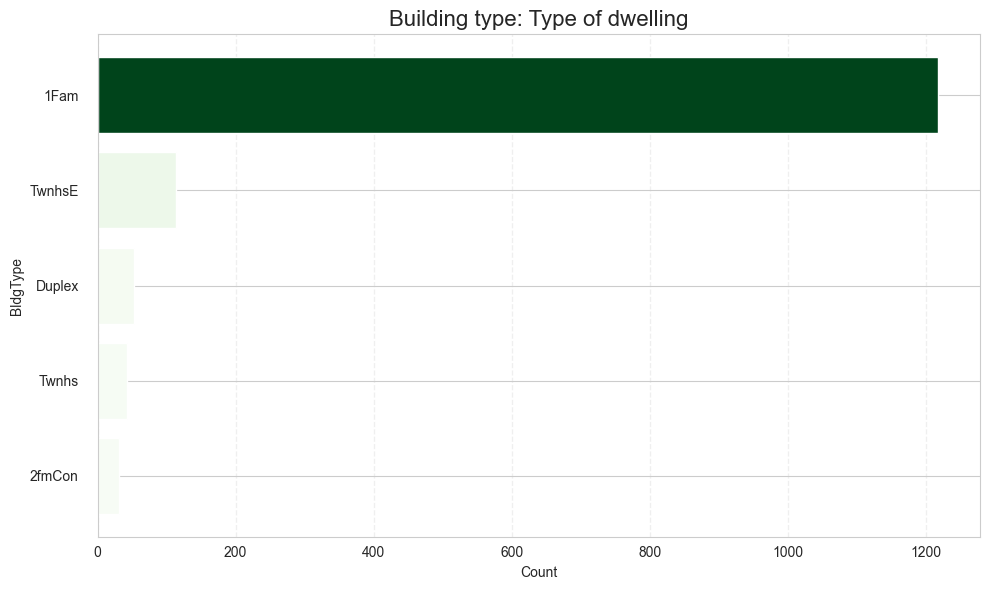

In [50]:
horizontal_plot(df, 'BldgType', 'Greens', 'Building type: Type of dwelling')


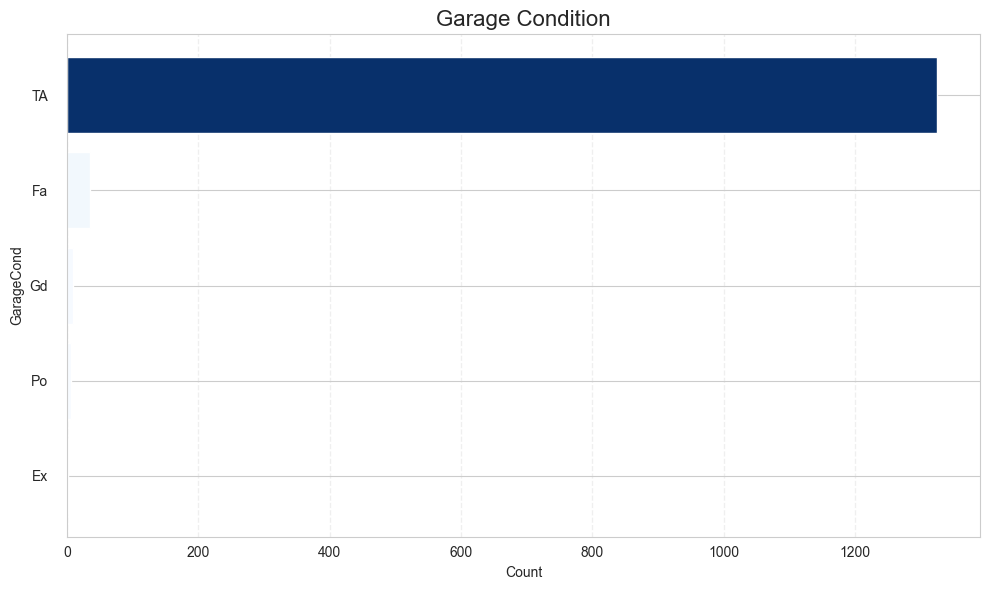

In [51]:
horizontal_plot(df, 'GarageCond', 'Blues', 'Garage Condition')

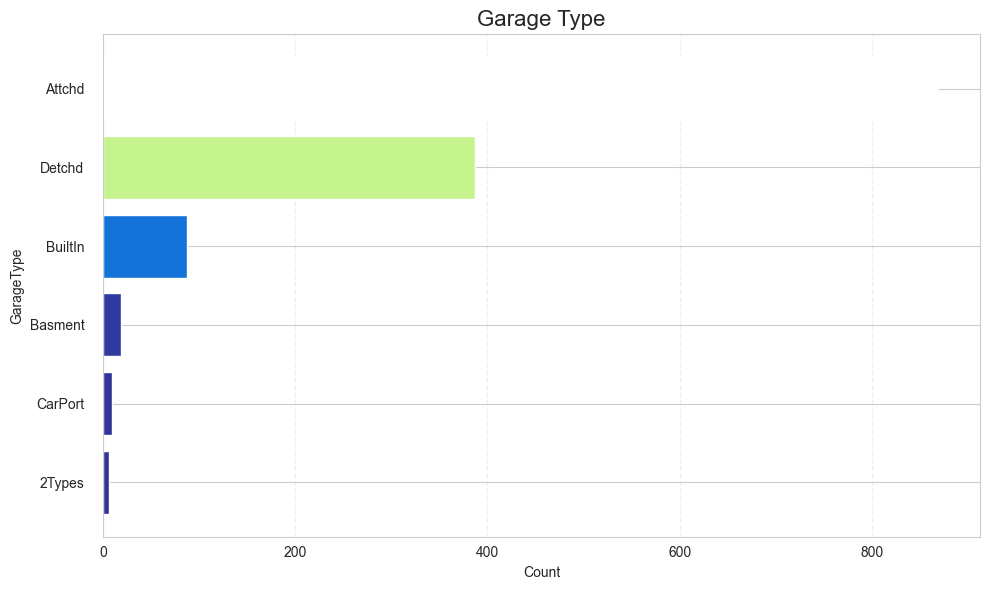

In [52]:
horizontal_plot(df, 'GarageType', 'terrain', 'Garage Type')

In [53]:
y = df['SalePrice'].reset_index(drop = True)
train_features = df.drop('SalePrice', axis = 1)
test_features = test.copy()

features = pd.concat((train_features, test_features)).reset_index(drop = True)

In [54]:
features.shape

(2917, 79)

In [55]:
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['MoSold'] = features['MoSold'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)

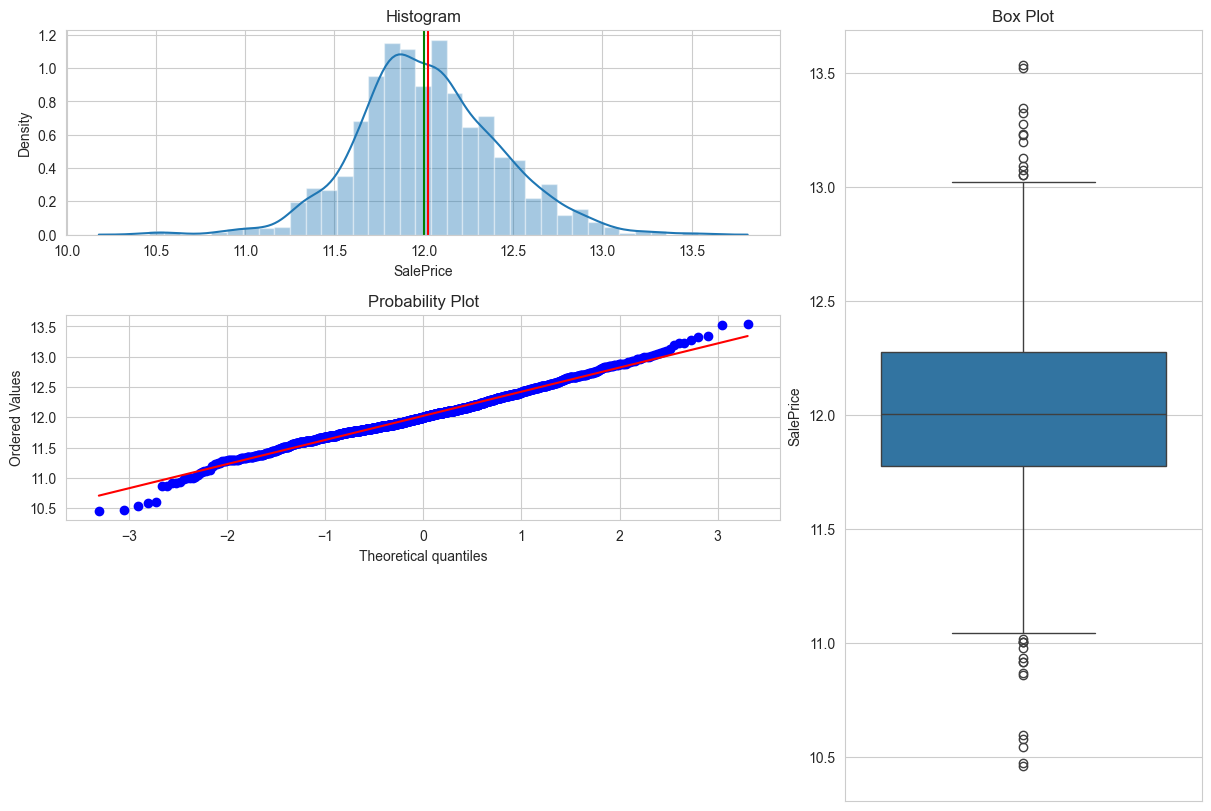

In [56]:
three_chart_plot(df, 'SalePrice')

In [57]:
null_table(features).sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
63,GarageCond,159,5.450806
59,GarageFinish,159,5.450806
62,GarageQual,159,5.450806
2,LotFrontage,486,16.660953
56,FireplaceQu,1420,48.680151
24,MasVnrType,1766,60.541652
72,Fence,2346,80.425094
5,Alley,2719,93.212204
73,MiscFeature,2812,96.400411
71,PoolQC,2908,99.691464


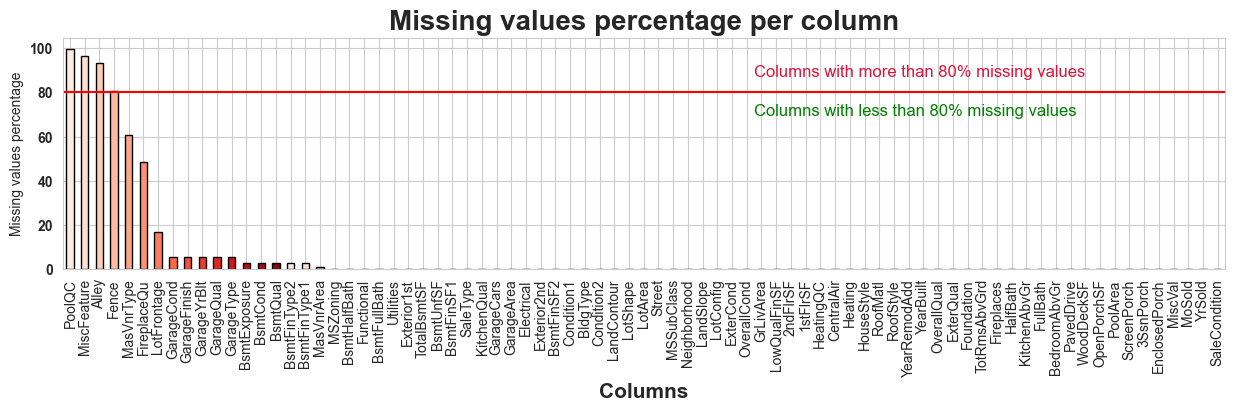

In [58]:
msv_1(features, 80, color = sns.color_palette('Reds',15))

In [59]:
features = features.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)
features.shape

(2917, 75)

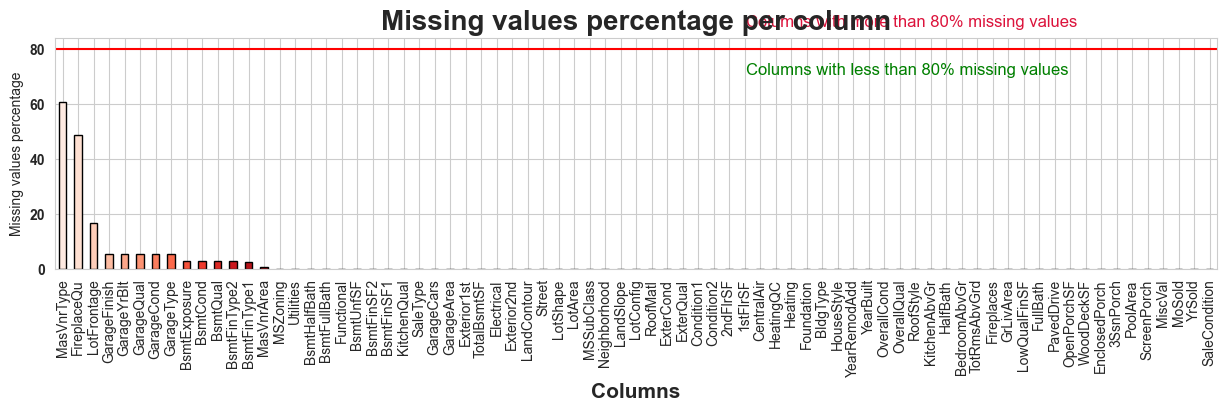

In [60]:
msv_1(features, 80, color = sns.color_palette('Reds',15))

In [65]:
description = open("data_description.txt", "r")
print(description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM